<a href="https://colab.research.google.com/github/farihane-redouan/CONVOLUTIONAL-NEURAL-NETWORK/blob/main/Multi_class_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
from keras.datasets import cifar10
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

# **1.Charger la BD Cifar10**

In [11]:
def charger_dataset():
  (trainX, trainY), (testX, testY) = cifar10.load_data()
  trainY = to_categorical(trainY)
  testY = to_categorical(testY)
  return trainX, trainY, testX, testY

trainX, trainY, testX, testY = charger_dataset()
print(np.shape(trainX), np.shape(trainY), np.shape(testX), np.shape(testY))

170500096/170498071 [==============================] - 5s 0us/step
(50000, 32, 32, 3) (50000, 10) (10000, 32, 32, 3) (10000, 10)


# **2.Visualisation des exemples**

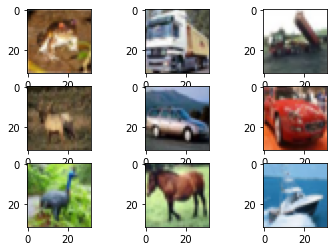

In [12]:
for i in range(9):
  plt.subplot(330+i+1)
  plt.imshow(trainX[i])
plt.show()

In [13]:
trainX[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

# **3.Préparation de la base de données**

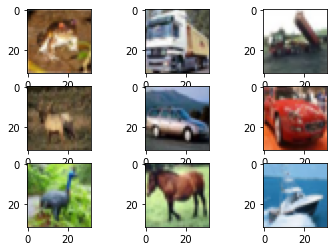

[[[0.23137255 0.24313726 0.24705882]
  [0.16862746 0.18039216 0.1764706 ]
  [0.19607843 0.1882353  0.16862746]
  ...
  [0.61960787 0.5176471  0.42352942]
  [0.59607846 0.49019608 0.4       ]
  [0.5803922  0.4862745  0.40392157]]

 [[0.0627451  0.07843138 0.07843138]
  [0.         0.         0.        ]
  [0.07058824 0.03137255 0.        ]
  ...
  [0.48235294 0.34509805 0.21568628]
  [0.46666667 0.3254902  0.19607843]
  [0.47843137 0.34117648 0.22352941]]

 [[0.09803922 0.09411765 0.08235294]
  [0.0627451  0.02745098 0.        ]
  [0.19215687 0.10588235 0.03137255]
  ...
  [0.4627451  0.32941177 0.19607843]
  [0.47058824 0.32941177 0.19607843]
  [0.42745098 0.28627452 0.16470589]]

 ...

 [[0.8156863  0.6666667  0.3764706 ]
  [0.7882353  0.6        0.13333334]
  [0.7764706  0.6313726  0.10196079]
  ...
  [0.627451   0.52156866 0.27450982]
  [0.21960784 0.12156863 0.02745098]
  [0.20784314 0.13333334 0.07843138]]

 [[0.7058824  0.54509807 0.3764706 ]
  [0.6784314  0.48235294 0.16470589]


In [14]:
def normalizationImage(trainX, testX):
  trainXNorm = trainX.astype('float32')
  testXNorm = testX.astype('float32')
  trainXNorm /= 255.
  testXNorm /= 255.
  return trainXNorm, testXNorm
trainXNorm, testXNorm = normalizationImage(trainX, testX)

for i in range(9):
  plt.subplot(330+i+1)
  plt.imshow(trainXNorm[i])
plt.show()

print(trainXNorm[0])

# **3.Définition de trois modèles**

In [15]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, MaxPooling2D, Conv2D
from keras.optimizers import Adam

In [16]:
#Deux couches de convolution et une couche de maxpooling
def model1():
  model = Sequential()
  model.add(Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)))
  model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
  model.add(MaxPooling2D(2,2))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dense(10, activation='softmax'))
  opt = Adam(lr=0.001)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

#Quatre couche de convolution et deux couches de maxpooling
def model2():
  model = Sequential()
  model.add(Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)))
  model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
  model.add(MaxPooling2D(2,2))
  model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
  model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
  model.add(MaxPooling2D(2,2))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dense(10, activation='softmax'))
  opt = Adam(lr=0.001)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

#six couche de convolution et six couches de maxpooling
def model3():
  model = Sequential()
  model.add(Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)))
  model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
  model.add(MaxPooling2D(2,2))
  model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
  model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
  model.add(MaxPooling2D(2,2))
  model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
  model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
  model.add(MaxPooling2D(2,2))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dense(10, activation='softmax'))
  opt = Adam(lr=0.001)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model  

# **4.Visualisation des résultats**

In [17]:
def visualisation(history):
  plt.subplot(211)
  plt.plot(history.history['loss'], color='blue', label='train')
  plt.plot(history.history['val_loss'], color='red', label='test')
  plt.title("Cross entropy loss")

  plt.subplot(212)
  plt.plot(history.history['accuracy'], color='blue', label='train')
  plt.plot(history.history['val_accuracy'], color='red',label='test')
  plt.title('Classification accuracy')


# **5.Apprentissage et Évaluation**

In [18]:
def ApprentissageEvaluation(nb_model):
  trainX, trainY, testX, testY = charger_dataset()
  trainXNorm, testXNorm = normalizationImage(trainX, testX)
  if nb_model==1:
    model = model1()
  elif nb_model==2:
    model = model2()
  elif nb_model==3:
    model = model3()
  elif  nb_model==4:
    model = model4()

  history = model.fit(trainXNorm, trainY, epochs=100, batch_size=60, validation_data=(testXNorm, testY), verbose=1)
  error, acc = model.evaluate(testXNorm, testY)
  print("accuracy: ", acc)
  visualisation(history)

Epoch 1/100
834/834 [==============================] - 5s 6ms/step - loss: 1.4019 - accuracy: 0.4957 - val_loss: 1.0512 - val_accuracy: 0.6237
Epoch 2/100
834/834 [==============================] - 5s 6ms/step - loss: 0.9420 - accuracy: 0.6690 - val_loss: 0.8863 - val_accuracy: 0.6893
Epoch 3/100
834/834 [==============================] - 5s 6ms/step - loss: 0.7532 - accuracy: 0.7359 - val_loss: 0.7878 - val_accuracy: 0.7303
Epoch 4/100
834/834 [==============================] - 5s 6ms/step - loss: 0.6293 - accuracy: 0.7807 - val_loss: 0.7478 - val_accuracy: 0.7422
Epoch 5/100
834/834 [==============================] - 5s 6ms/step - loss: 0.5275 - accuracy: 0.8142 - val_loss: 0.7788 - val_accuracy: 0.7432
Epoch 6/100
834/834 [==============================] - 5s 6ms/step - loss: 0.4362 - accuracy: 0.8467 - val_loss: 0.7611 - val_accuracy: 0.7560
Epoch 7/100
834/834 [==============================] - 5s 6ms/step - loss: 0.3508 - accuracy: 0.8771 - val_loss: 0.8548 - val_accuracy: 0.7448

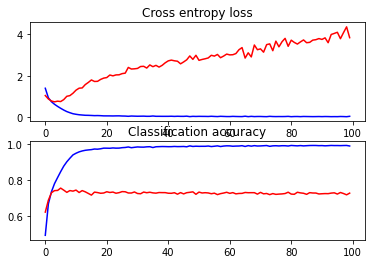

In [24]:
ApprentissageEvaluation(2)

# **6.Régulariser le modèle**

In [21]:
#Nous allons dans cette étape introduire la technique de régularisation dropout
from keras.layers import Dropout

In [22]:
def model4():
  model = Sequential()
  model.add(Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)))
  model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
  model.add(MaxPooling2D(2,2))
  model.add(Dropout(0.25))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dense(10, activation='softmax'))
  opt = Adam(lr=0.001)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model


Epoch 1/100
834/834 [==============================] - 5s 6ms/step - loss: 1.3664 - accuracy: 0.5099 - val_loss: 1.0858 - val_accuracy: 0.6220
Epoch 2/100
834/834 [==============================] - 4s 5ms/step - loss: 0.9992 - accuracy: 0.6497 - val_loss: 0.9634 - val_accuracy: 0.6578
Epoch 3/100
834/834 [==============================] - 4s 5ms/step - loss: 0.8636 - accuracy: 0.6979 - val_loss: 0.9009 - val_accuracy: 0.6828
Epoch 4/100
834/834 [==============================] - 4s 5ms/step - loss: 0.7629 - accuracy: 0.7325 - val_loss: 0.8851 - val_accuracy: 0.6895
Epoch 5/100
834/834 [==============================] - 4s 5ms/step - loss: 0.6694 - accuracy: 0.7648 - val_loss: 0.8799 - val_accuracy: 0.7014
Epoch 6/100
834/834 [==============================] - 4s 5ms/step - loss: 0.5857 - accuracy: 0.7930 - val_loss: 0.9479 - val_accuracy: 0.6926
Epoch 7/100
834/834 [==============================] - 4s 5ms/step - loss: 0.5065 - accuracy: 0.8199 - val_loss: 0.9187 - val_accuracy: 0.7015

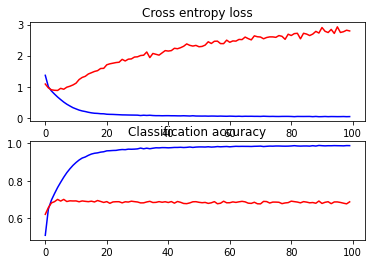

In [23]:
ApprentissageEvaluation(4)